In [2]:
from models import ImageMerger
import torch

# Load the trained model
device = torch.device("cuda")
model_path = "models/generator/model_epoch_1.pth"  # Adjust path if needed
checkpoint = torch.load(model_path, map_location=device)
model = ImageMerger().to(device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # Set model to evaluation mode

ImageMerger(
  (feature_extractor): SharedFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   

/home/cao/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


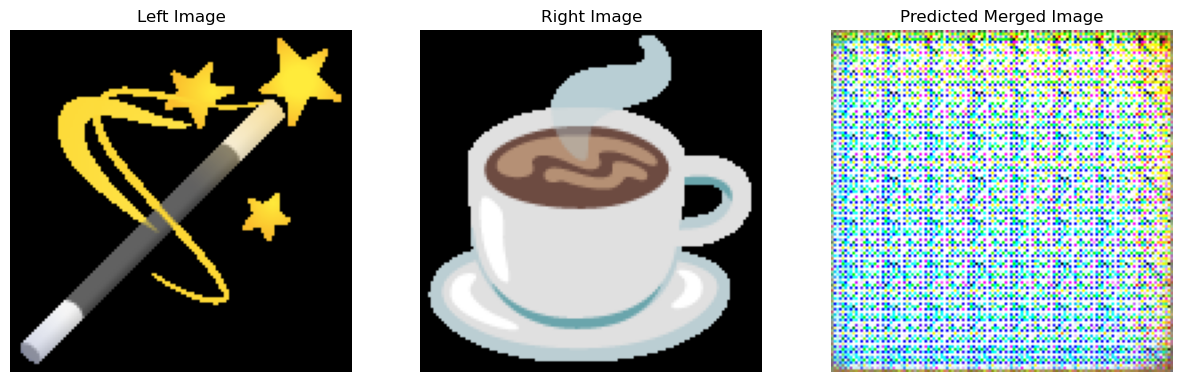

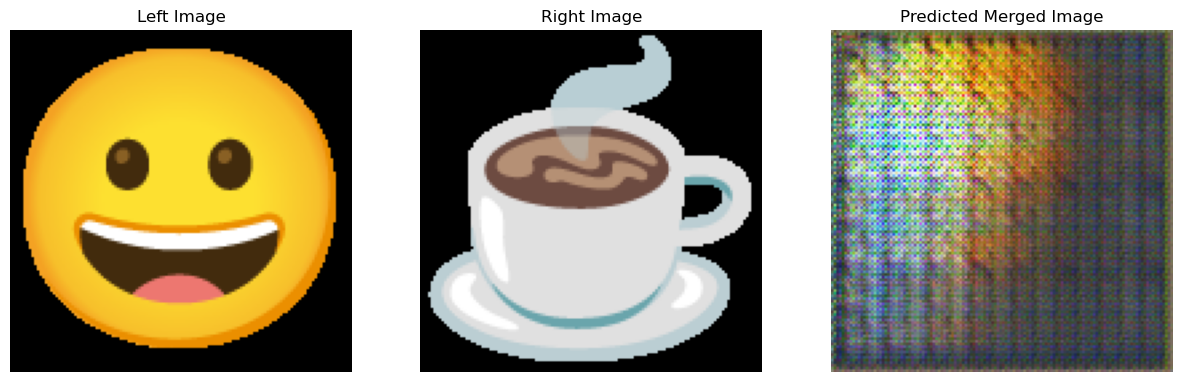

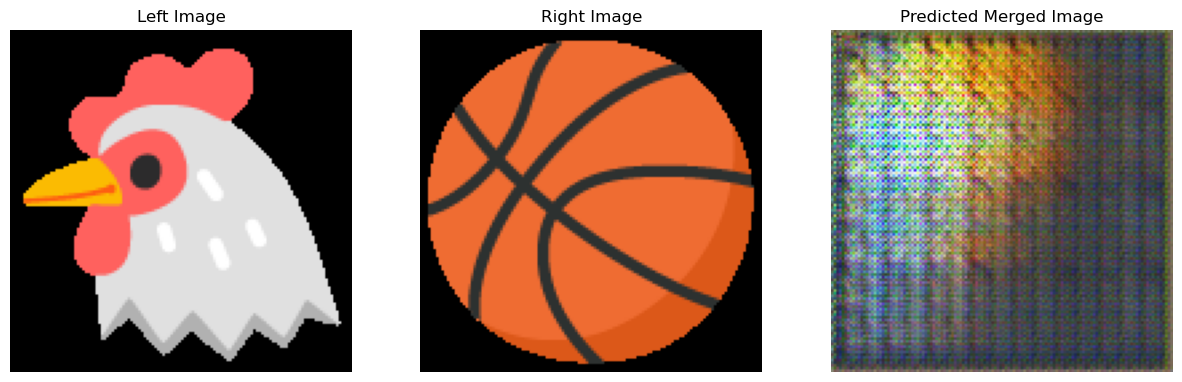

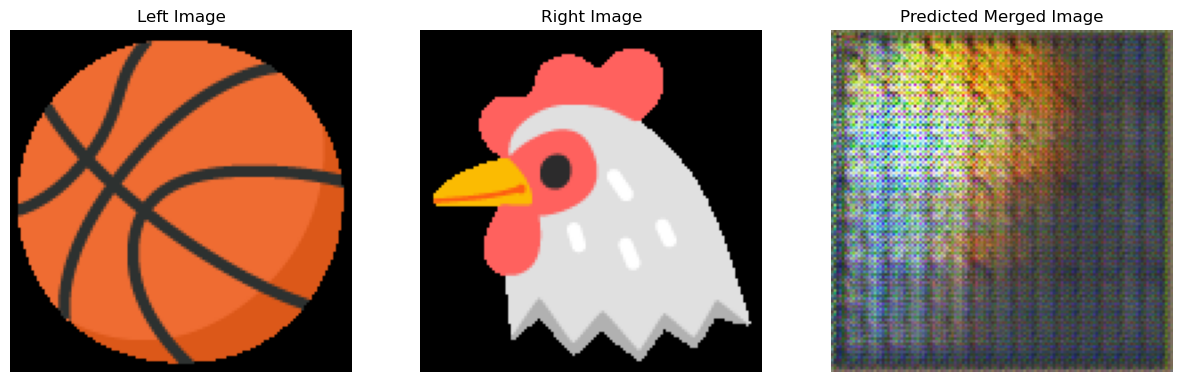

In [3]:
from dataset import getEmojiUrl
from PIL import Image
import requests
from torchvision import transforms
import matplotlib.pyplot as plt

# Function to load an image from URL and apply transformations
def load_image_from_url(url, size=128):
    transform = transforms.Compose([transforms.Resize((size, size)), transforms.ToTensor()])
    img = Image.open(requests.get(url, stream=True).raw)
    img = img.convert('RGB')
    return transform(img)

# Load a few pairs of images
image_pairs = [
    ("1fa84", "2615"),
    ("1f600", "2615"),  
    ("1f414", "1f3c0"), 
    ("1f3c0", "1f414"), 
    # Add as many pairs as you want to check
]

# Plot and predict
for left_emoji, right_emoji in image_pairs:
    left_img_url = getEmojiUrl(left_emoji)
    right_img_url = getEmojiUrl(right_emoji)
    
    left_img = load_image_from_url(left_img_url).unsqueeze(0).to(device)  # Add batch dimension
    right_img = load_image_from_url(right_img_url).unsqueeze(0).to(device)  # Add batch dimension
    
    with torch.no_grad():
        output = model(left_img, right_img)
    
    # Displaying images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(transforms.ToPILImage()(left_img.squeeze(0).cpu()))
    axs[0].set_title("Left Image")
    axs[0].axis('off')
    
    axs[1].imshow(transforms.ToPILImage()(right_img.squeeze(0).cpu()))
    axs[1].set_title("Right Image")
    axs[1].axis('off')
    
    axs[2].imshow(transforms.ToPILImage()(output.squeeze(0).cpu()))
    axs[2].set_title("Predicted Merged Image")
    axs[2].axis('off')
    
    plt.show()